# Ridge Regression

In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Features Preparation
 * Standardization
 * PCA ( TODO )
 * Polynomial basis

In [5]:
from helpers import *
# Standardization
#tX_norm = normalize(tX)

# Polynomial Basis
degree = 2
print("normal", tX.shape)
tX_poly = polynomialBasis(tX, degree)
tX_basis = tX_poly
print("basis", tX_basis.shape)

tXTr, mean_x, std_x = standardize(tX_basis)


normal (250000, 30)
basis (250000, 60)


## Parameter Optimization

In [6]:
from cross_validation import *

k_fold = 2
nbPoints = 30
lambdas = np.logspace(-4, 0, nbPoints)
losses_tr = []
losses_te = []

#print("Gammas: {}".format(gammas))

i = 0    
for lam in lambdas:
    i = i + 1
    print("Step", i, "over", nbPoints, "| gamma: ", lam)
    loss_train = []
    loss_test = []
    initial_w = np.zeros((tXTr.shape[1]))
     
    for k in range (k_fold):
        loss_tr, loss_te = cross_validation(y, tXTr, k_fold, k, lam, initial_w, 0, "ridge_regression")
        loss_train.append(loss_tr)
        loss_test.append(loss_te)
        
    
    # rmse of the mean mse
    loss_tr = np.sum(loss_train, axis=0)/k_fold
    loss_te = np.sum(loss_test, axis=0)/k_fold
    losses_tr.append(loss_tr)
    losses_te.append(loss_te)
    print("  -> loss_tr: {}\n  -> loss_te: {}".format(loss_tr, loss_te))



Step 1 over 30 | gamma:  0.0001
  -> loss_tr: 0.3239153885723445
  -> loss_te: 0.3766702453747778
Step 2 over 30 | gamma:  0.000137382379588
  -> loss_tr: 0.32392502514172694
  -> loss_te: 0.37537193319657564
Step 3 over 30 | gamma:  0.000188739182214
  -> loss_tr: 0.32393483076851387
  -> loss_te: 0.37378668129745557
Step 4 over 30 | gamma:  0.00025929437974
  -> loss_tr: 0.32394618884910675
  -> loss_te: 0.3718094518372683
Step 5 over 30 | gamma:  0.000356224789026
  -> loss_tr: 0.32396134735851045
  -> loss_te: 0.36933685876781097
Step 6 over 30 | gamma:  0.000489390091848
  -> loss_tr: 0.32398397086349107
  -> loss_te: 0.3662829121319475
Step 7 over 30 | gamma:  0.00067233575365
  -> loss_tr: 0.3240199559609323
  -> loss_te: 0.3626033395252596
Step 8 over 30 | gamma:  0.000923670857187
  -> loss_tr: 0.3240785122556323
  -> loss_te: 0.3583276343698847
Step 9 over 30 | gamma:  0.00126896100317
  -> loss_tr: 0.3241733746897635
  -> loss_te: 0.3535909365272311
Step 10 over 30 | gamma: 

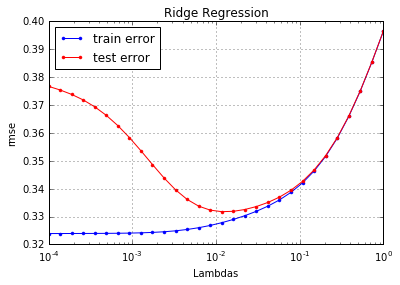

In [7]:
plt.semilogx(lambdas, losses_tr, marker=".", color='b', label='train error')
plt.semilogx(lambdas, losses_te, marker=".", color='r', label='test error')
plt.xlabel("Lambdas")
plt.ylabel("rmse")
plt.title("Ridge Regression")
plt.legend(loc=2)
plt.grid(True)
plt.savefig("cross_validation_ridge_d2")

=> Lambda : 10e-3

## Predict

In [19]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
print(tX_test.shape)

(568238, 30)


In [ ]:
lambda_ = 0.001

tXTr = np.hstack((np.ones((tX_basis.shape[0],1)), tX_basis))
train_w, loss_tr = ridge_regression(y, tXTr, lambda_)


tXTe = polynomialBasis(tXTe, 2, True)
tXTe = np.delete(tX_basis, num_useless)
tXTe, mean_, std_ = standardize(tXTe)



In [ ]:
OUTPUT_PATH = '../output/out-ridge-d2.csv'

y_pred = predict_labels(train_w, tXTe)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)